# stator

> definition of stator class. Supports only one slot shape. Calculates all necessary parameters required for area, resistance, inductance

In [ ]:
#| default_exp stator

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import numpy as np
from PIL import Image

## stator class is defined by the following parameters

1. slots
2. outer diameter
3. inner diameter fraction
4. slot opening fraction
5. shoe height fraction
6. tooth width fraction
7. back iron fraction
8. stack length
9. winding layers
10. coil pitch
11. turns per coil
12. parallel paths

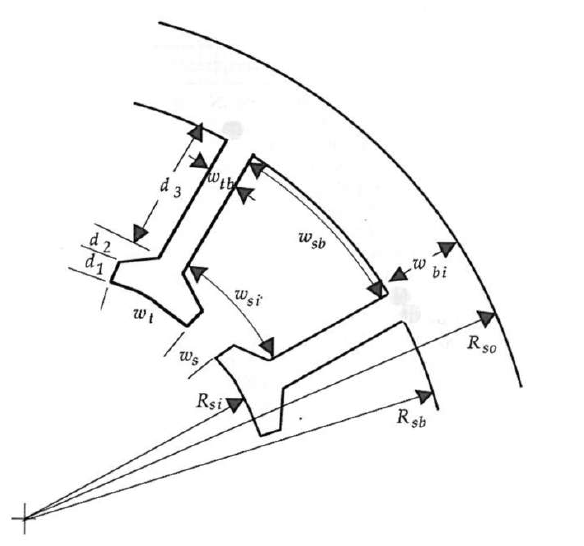

In [ ]:
#|echo: false
Image.open('./Images/stator_dims.png')

In [ ]:
#| export
class stator:
    def __init__(self):
        self.slots = 0
        self.poles = 0
        self.outerdiameter = 0
        self.innerdiameter_fraction = 0
        self.slotopening_fraction = 0
        self.slot_shape = 'rectangle'
        self.shoeheight_fraction = 0
        self.toothwidth_fraction = 0
        self.backiron_fraction = 0
        self.stacklength = 0
        self.windinglayers = 0
        self.coilpitch = 0
        self.turns = 0
        self.strands = 0
        self.strand_dia = 0
        self.parallelpaths = 0
        self.steel_grade = 0
        self.valid = False
        self.params = 0
    
    def valid_design(self):

        # check number of slots
        if self.slots < 0 or self.slots%3 != 0:
            print('Invalid stator slots for a 3phase machine')
            return 0
        
        # verify stator outer diameter
        if self.outerdiameter <= 0:
            print('Invalid stator outer diameter')
            return 0
        
        self.calculate_parameters()
        self.valid = True
    
    def calculate_parameters(self):
        """calculate dimensions requied for calculation of stator properties
        """
        Rso = self.outerdiameter/2
        Rsi = Rso*self.innerdiameter_fraction
        d1 = (Rso - Rsi)*self.shoeheight_fraction
        d2 = d1
        wbi = (Rso - Rsi - d1 - d2)*self.backiron_fraction
        d3 = (Rso - Rsi - d1 - d2 -wbi)
        th_s = np.pi*2/self.slots
        ws = 2*Rsi*np.sin(th_s*self.slotopening_fraction/2)
        wtb = 2*Rsi*np.sin(th_s*self.slotopening_fraction*self.toothwidth_fraction/2)
        wsi = (Rsi + d1 + d2) - wtb
        wsb = (Rsi + d1 + d2 + d3) - wtb
        As = (th_s*(Rsi + d1 + d2 + d3/2) - wtb)*d3/2

        self.params = {'Rso': Rso,
                        'Rsi': Rsi,
                        'd1': d1,
                        'd2': d2,
                        'wbi': wbi,
                        'd3': d3,
                        'th_s': th_s,
                        'ws': ws,
                        'wtb': wtb,
                        'wsi': wsi,
                        'wsb': wsb,
                        'As': As}

    
    def calculate_inductance(self):
        if self.valid:
            print('yet to be included')
        else:
            print('stator is invalid. please provide valid design using the valid_design() method')


In [ ]:
show_doc(stator)

---

[source](https://github.com/NaveenDeepak/emdesigner/blob/main/emdesigner/stator.py#L11){target="_blank" style="float:right; font-size:smaller"}

### stator

>      stator ()

Initialize self.  See help(type(self)) for accurate signature.

In [ ]:
show_doc(stator.calculate_parameters)

---

[source](https://github.com/NaveenDeepak/emdesigner/blob/main/emdesigner/stator.py#L48){target="_blank" style="float:right; font-size:smaller"}

### stator.calculate_parameters

>      stator.calculate_parameters ()

calculate dimensions requied for calculation of stator properties

### test examples

In [ ]:
s1 = stator()
s1.valid_design()

Invalid stator outer diameter


0

In [ ]:
s1 = stator()
s1.slots = 12
s1.poles = 10
s1.outerdiameter = 125
s1.innerdiameter_fraction = 75/125
s1.slotopening_fraction = 0.3
s1.shoeheight_fraction = 0.1
s1.toothwidth_fraction = 0.5
s1.backiron_fraction = 0.3
s1.stacklength = 60
s1.windinglayers = 2
s1.coilpitch = 1
s1.turns = 11
s1.strands = 1
s1.strand_dia = 2
s1.parallelpaths = 2
s1.steel_grade = '50C470'

In [ ]:
s1.valid_design()
print(s1.valid)

True


In [ ]:
s1.params

{'Rso': 62.5,
 'Rsi': 37.5,
 'd1': 2.5,
 'd2': 2.5,
 'wbi': 6.0,
 'd3': 14.0,
 'th_s': 0.5235987755982988,
 'ws': 5.884432179588369,
 'wtb': 2.944486181930145,
 'wsi': 39.555513818069855,
 'wsb': 53.555513818069855,
 'As': 160.8155724712995}

In [ ]:
s1.params['Rso']

62.5

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()